<a href="https://colab.research.google.com/github/ugnet/Faster-RCNN/blob/main/Faster_RCNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import csv
from skimage.io import imread_collection
import os
from csv import reader

#uzsikrauti paveiksliukus



In [ ]:
# our module
class FasterRCNN(nn.Module):
  def __init__(self):
    super.__init__()
    self.vgg = VGG16()


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

class FasterRCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 128, 3)
        # self.linear = nn.Linear(256, 2)
        self.linear = MyLinearLayer(256, 2)

    def forward(self, x):
        x = self. conv(x)
        x = x.view(-1, 256)
        return self.linear(x)

class RPNLayer(nn.Module): #layer
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, feature_map):
        feature_map = torch.mm(x, self.weights.t())
        return torch.add(w_times_x, self.bias)  # w times x + b

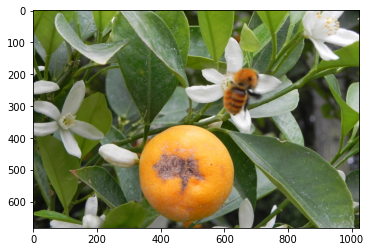

(683, 1024, 3)
the shape of loaded image transformed into numpy array: (683, 1024, 3)
transformed image: [[[ 14 134  99]
  [ 15 135 100]
  [ 15 135 100]
  ...
  [ 23  37  31]
  [ 23  37  31]
  [ 24  38  32]]

 [[ 14 134  99]
  [ 15 135 100]
  [ 15 135 100]
  ...
  [ 24  38  32]
  [ 24  38  32]
  [ 24  38  32]]

 [[ 16 133 100]
  [ 17 134 101]
  [ 15 135 101]
  ...
  [ 25  40  32]
  [ 25  40  32]
  [ 25  40  32]]

 ...

 [[ 24  26  26]
  [ 26  28  28]
  [ 30  32  32]
  ...
  [ 23  56  42]
  [ 24  56  45]
  [ 26  58  47]]

 [[ 24  26  26]
  [ 26  28  28]
  [ 29  31  31]
  ...
  [ 26  59  45]
  [ 27  59  48]
  [ 29  61  50]]

 [[ 24  26  26]
  [ 26  28  28]
  [ 28  30  30]
  ...
  [ 29  62  48]
  [ 30  62  51]
  [ 32  64  53]]]
siiize torch.Size([1, 3, 800, 800])
transformed numpy array: tensor([[[0.0549, 0.0588, 0.0588,  ..., 0.0902, 0.0902, 0.0941],
         [0.0549, 0.0588, 0.0588,  ..., 0.0941, 0.0941, 0.0941],
         [0.0627, 0.0667, 0.0588,  ..., 0.0980, 0.0980, 0.0980],
         

In [ ]:
import torch
image = cv2.imread('/content/drive/MyDrive/GMM/OIDv4_ToolKit/OID/Dataset/test/Bee/000e4e7ed48c932d.jpg')
img_cvt=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
# image = torch.zeros((1, 3, 800, 800)).float()
# print(image)

# transform Image into the numpy array
image_2_npArray = np.asarray(image)
print(np.shape(image_2_npArray))
print('the shape of loaded image transformed into numpy array: {}'.format(np.shape(image_2_npArray)))
print('transformed image: {}'.format(image_2_npArray))

# transform the numpy array into the tensor
image = torchvision.transforms.ToTensor()(image_2_npArray)
# add one more dimension
image = image.unsqueeze(0)
#resize
image = F.interpolate(image, 800)
print('siiize', image.shape)
print('transformed numpy array: {}'.format(tensor))
# tensor = torch.reshape(tensor, (1, 3, 800, 800))
# print(tensor.shape())

In [ ]:
model = torchvision.models.vgg16(pretrained=True)
fe = list(model.features)
print(fe) # length is 15



[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [ ]:
req_features = []
k = image.clone()
for i in fe:
    k = i(k)
    if k.size()[2] < 800//16:
        break
    req_features.append(i)
    out_channels = k.size()[1]
print(len(req_features)) #30
print(out_channels) # 512
print(req_features)

30
512
[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), paddin

In [ ]:
faster_rcnn_fe_extractor = nn.Sequential(*req_features)

In [ ]:
#function for getting vgg feature extractor
def get_vgg_fe_extractor():
  features=[]
  features.append(nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  features.append(nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
  features.append(nn.ReLU(inplace=True))
  #tolesniu vgg operaciju nevykdome

  fe_extractor = nn.Sequential(*features)
  return fe_extractor

vgg_feature_extractor = get_vgg_fe_extractor()
feature_map = vgg_feature_extractor(image)
print(feature_map.size())

torch.Size([1, 512, 42, 64])


In [ ]:
#function for vizualizing feature maps
def vizualize_feature_maps(feature_map, r):
  imgArray = feature_map.data.cpu().numpy().squeeze(0)
  fig=plt.figure(figsize=(12, 4))
  figNo=1
  for i in range(r):
    fig.add_subplot(1, r, figNo)
    plt.imshow(imgArray[i],  cmap='gray')
    figNo+=1
  plt.show()

torch.Size([1, 512, 50, 50])


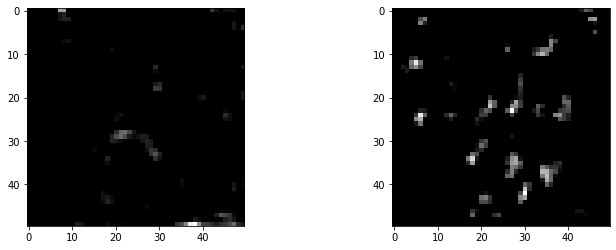

In [ ]:
# Now this faster_rcnn_fe_extractor can be used as our backend. Lets compute the features
feature_map = faster_rcnn_fe_extractor(image)
print(feature_map.size())

#Vizualize first 5 feature maps
vizualize_feature_maps(feature_map, 2)
#OUT MAP IS feature map

In [ ]:
fe_size=(800//16)
ctr_x = np.arange(16, (fe_size+1)*16, 16)
ctr_y = np.arange(16, (fe_size+1)*16, 16)
print(len(ctr_x), ctr_x)

50 [ 16  32  48  64  80  96 112 128 144 160 176 192 208 224 240 256 272 288
 304 320 336 352 368 384 400 416 432 448 464 480 496 512 528 544 560 576
 592 608 624 640 656 672 688 704 720 736 752 768 784 800]


In [ ]:
index=0
ctr = np.zeros((2500, 2))
for x in range(len(ctr_x)):
  for y in range(len(ctr_y)):
    ctr[index, 1] = ctr_x[x]-8
    ctr[index, 0] = ctr_y[y]-8
    index +=1
print(ctr.shape)

(2500, 2)


# **Load datasets**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [228]:
import pandas as pd
CLASS_BEE = "/m/01h3n"
CLASS_FRUIT = "/m/02xwb"
CLASS_SEAFOOD = "/m/06nwz"
label_types = [CLASS_BEE, CLASS_FRUIT, CLASS_SEAFOOD]
NOT_FOUND = "not_found"
csv_file=pd.read_csv('/content/drive/MyDrive/GMM/OIDv4_ToolKit/OID/csv_folder/test-annotations-bbox.csv')
print(csv_file)

root_path = '/content/drive/MyDrive/GMM/OIDv4_ToolKit/OID/Dataset/test/Bee'

#your path 
bee_images_dir = '/content/drive/MyDrive/GMM/OIDv4_ToolKit/OID/Dataset/test/Bee/*.jpg'
bee_images = imread_collection(bee_images_dir)

#how to update boxes?
class Dataset():
  def __init__(self, purpose):
    self.list_of_items = []
    self.purpose = purpose

  def getItem(self, image_name):
    if ( len(self.list_of_items) == 0):
      return NOT_FOUND
    for item in self.list_of_items:
      if(item.id == image_name):
        return item
    return NOT_FOUND

  def addItem(self, item):
    self.list_of_items = np.append(self.list_of_items, item)

  def addBoxToItem(self, id, coordinates):
    item = self.getItem(id)
    item.addBox(coordinates)

class Item():
  def __init__(self, id, name, path, item_class, box_coordinates):
    self.id = id
    self.name = name
    self.path = path
    self.item_class = item_class
    self.box_coordinates = box_coordinates

  def getBoxes(self):
    return self.box_coordinates

  def addBox(self, coordonates):
    self.box_coordinates = np.append(self.box_coordinates, coordonates, axis=0)

def getImageFileNamesFromPath(path):
  image_full_file_paths = []
  image_file_names = []

  for path in os.listdir(dir):
      full_path = os.path.join(dir, path)
      file_name = os.path.splitext(path)[0]
      image_file_names = np.append(image_file_names, file_name)
      if os.path.isfile(full_path):
        image_full_file_paths = np.append(image_full_file_paths, full_path)

  return [image_full_file_paths, image_file_names]

#paduodame atrinktas csv failo eilutes turincias tik bbox'us mus dominancioms klasems
def createDataset(purpose, csv_rows):
  dataset = Dataset(purpose)
  for row in csv_rows:
    id = row[0] #also id
    img_name = id + ".jpg"
    image_path = root_path + img_name
    item_class = row[2]
    box_coordinates = np.asarray(np.asarray(row[4:8]))

    if (dataset.getItem(id) == NOT_FOUND):
      print("PRIDEJOOM")
      dataset.addItem(Item(id, img_name, image_path, item_class, box_coordinates))
    else:
      print("JAU TUREJO")
      dataset.addBoxToItem(id, box_coordinates)

  return dataset

#is sio metodo gaunamas rows paduadame kurdami dataseta
def filterCsvRows(imageDirPaths):
  imageFileNames = []
  for path in imageDirPaths:
    full, notfull = getImageFileNamesFromPath(path)
    imageFileNames = np.concatenate((imageFileNames, notfull))
  filteredRows = csv_file[(csv_file.LabelName.isin(label_types)) & (csv_file.ImageID.isin(imageFileNames))]
  filteredRows = filteredRows.values
  return filteredRows;



                 ImageID    Source  ... IsDepiction  IsInside
0       000026e7ee790996  freeform  ...           0         0
1       000026e7ee790996  freeform  ...           0         0
2       000026e7ee790996  freeform  ...           0         0
3       000062a39995e348  freeform  ...           0         0
4       000062a39995e348  freeform  ...           0         0
...                  ...       ...  ...         ...       ...
625277  fffc6543b32da1dd  freeform  ...           0         0
625278  fffc6543b32da1dd  freeform  ...           0         0
625279  fffc6543b32da1dd  freeform  ...           0         0
625280  fffc6543b32da1dd  freeform  ...           0         0
625281  fffd0258c243bbea  freeform  ...           0         0

[625282 rows x 13 columns]


In [229]:
dir = "/content/drive/MyDrive/GMM/OIDv4_ToolKit/OID/Dataset/test/Bee"
full, notfull = getImageFileNamesFromPath([dir, dir])
label_types = [CLASS_BEE, CLASS_FRUIT, CLASS_SEAFOOD]

rows = filterCsvRows(dir)
createDataset("train", rows)
print(rows)

#rows = [row for row in csv_file if row['ImageID'] == id]



PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
JAU TUREJO
JAU TUREJO
JAU TUREJO
JAU TUREJO
JAU TUREJO
JAU TUREJO
JAU TUREJO
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
JAU TUREJO
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
JAU TUREJO
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
JAU TUREJO
JAU TUREJO
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
JAU TUREJO
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
PRIDEJOOM
P

In [ ]:
def train_model(epochs, model)

In [ ]:
# 
class RPN(nn.Module):
    
    def __init__(self, in_channels=512, mid_channels=512, n_anchor=9):
        super(RPN, self).__init__()   
        self.mid_channels = mid_channels
        self.in_channels = in_channels # depends on the output feature map. in vgg 16 it is equal to 512
        self.n_anchor = n_anchor # Number of anchors at each location
        self.conv1 = nn.Conv2d(self.in_channels, self.mid_channels, 3, 1, 1)
        self.reg_layer = nn.Conv2d(mid_channels, n_anchor *4, 1, 1, 0)
        self.cls_layer = nn.Conv2d(mid_channels, n_anchor *2, 1, 1, 0) 
        
        # conv sliding layer
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv1.bias.data.zero_()
        # Regression layer
        self.reg_layer.weight.data.normal_(0, 0.01)
        self.reg_layer.bias.data.zero_()
        # classification layer
        self.cls_layer.weight.data.normal_(0, 0.01)
        self.cls_layer.bias.data.zero_()
        
    def forward(self, k):
        bat_num = k.shape[0]
        x = self.conv1(k)
        pred_anchor_locs = self.reg_layer(x)
        pred_cls_scores = self.cls_layer(x)
        
        pred_anchor_locs = pred_anchor_locs.permute(0, 2, 3, 1).contiguous().view(bat_num, -1, 4)
        pred_cls_scores = pred_cls_scores.permute(0, 2, 3, 1).contiguous()
        objectness_score = pred_cls_scores#.view(bat_num, 50, 50, 9, 2)[:, :, :, :, 1].contiguous().view(bat_num, -1)
        pred_cls_scores  = pred_cls_scores.view(bat_num, -1, 2)
        
        return pred_anchor_locs, pred_cls_scores, objectness_score

model = RPN()
print(feature_map.shape)
result = model.forward(feature_map)
print(result)

torch.Size([1, 512, 85, 128])
(tensor([[[-0.0752, -0.0495, -0.0698, -0.0141],
         [-0.1839,  0.0753,  0.1285, -0.0905],
         [ 0.0846,  0.0526,  0.0335,  0.0008],
         ...,
         [ 0.0916, -0.0861, -0.1694,  0.0850],
         [ 0.0609, -0.1068,  0.0142, -0.0901],
         [ 0.1175, -0.0201,  0.0334,  0.0413]]], grad_fn=<ViewBackward>), tensor([[[ 0.0470, -0.0034],
         [-0.1261,  0.0868],
         [-0.0574,  0.0567],
         ...,
         [ 0.0930,  0.0496],
         [ 0.1583, -0.0193],
         [-0.0840,  0.0741]]], grad_fn=<ViewBackward>), tensor([[[[ 0.0470, -0.0034, -0.1261,  ...,  0.1019, -0.0648,  0.0368],
          [ 0.0543,  0.0975, -0.2160,  ...,  0.1453,  0.0039, -0.0259],
          [ 0.1142,  0.0343, -0.2137,  ...,  0.0229,  0.0253,  0.0115],
          ...,
          [-0.0079,  0.0149, -0.1221,  ...,  0.0023, -0.0964,  0.0161],
          [ 0.0409, -0.0100, -0.0660,  ...,  0.0309, -0.0864,  0.1021],
          [ 0.0055,  0.0435, -0.1614,  ..., -0.0667,  0.

In [ ]:
class Dataset(object):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir("")))
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        img = img.resize(ISIZE)
        img = np.array(img)
        img = normalize(img)
        img = img.transpose(2,0,1)
        img = torch.as_tensor(img, dtype=torch.float32)
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)
        mask = mask.resize(ISIZE)
        # convert the PIL Image into a numpy array
        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]
         # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        #print('********************:  ', idx, img.shape)
        #print('target: ', target['labels'])
        return img, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
#Main



